# Laboratory practice № 1 (representation forms of linear systems)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 16

## Preparation

Import neccessery libraries

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import control.matlab as ctrlmat
import sympy
import numpy as np

Configure simpy

In [2]:
sympy.init_printing()
p = sympy.Symbol("p")

Global simulation params

In [3]:
dt = 0.001  # simulation time delta

## Task 1 (SISO system in Input-Output form)

Set system params

In [4]:
a2, a1, a0, b2, b1, b0 = 6, 5, 2, 9, 1, 2

Construct transfer function

In [5]:
transferFunction_1 = ctrlmat.tf([b2, b1, b0], [1, a2, a1, a0])
transferFunction_1

TransferFunction(array([9, 1, 2]), array([1, 6, 5, 2]))

Modeling params

In [6]:
modeling_time_1 = 25 # sec
time_1 = np.linspace(0,modeling_time_1,int(modeling_time_1/dt))
u_1 = np.ones_like(time_1)
init_state_1 = 0

Modeling

Text(0.5, 1.0, 'Output signal')

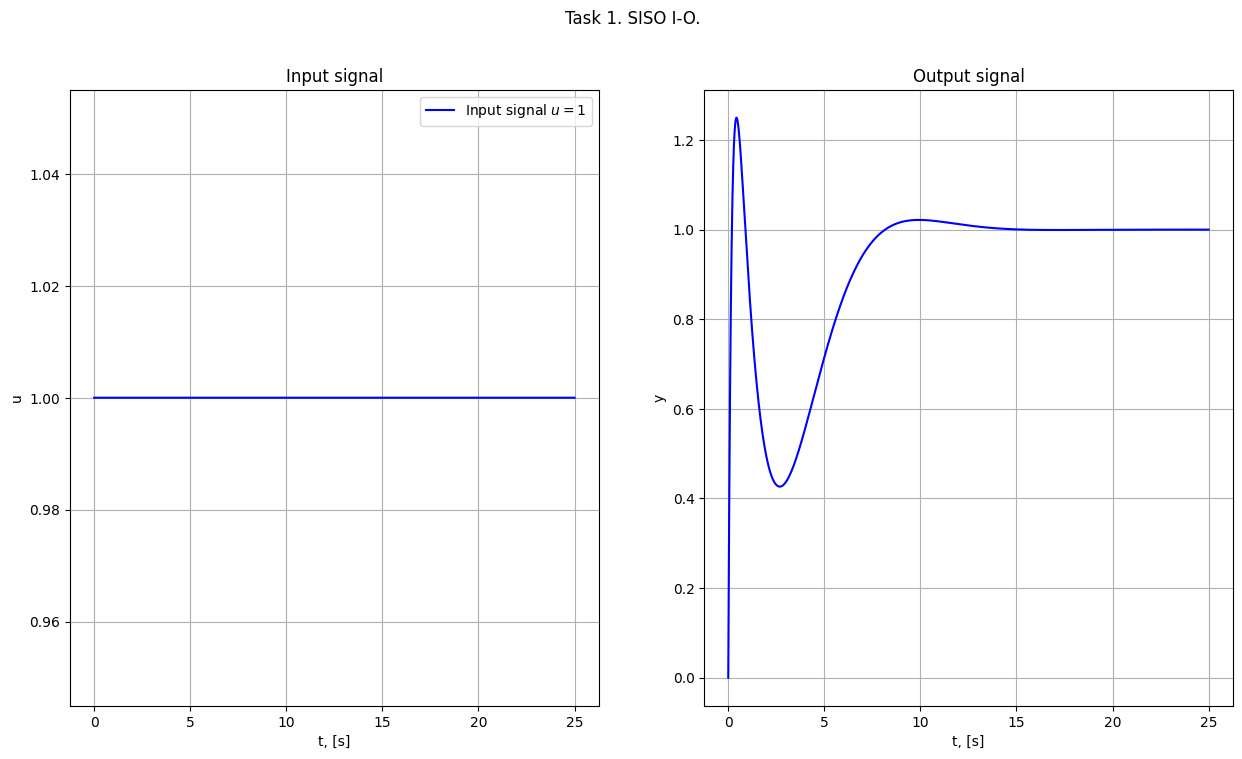

In [7]:
y_1 = ctrl.forced_response(transferFunction_1, U=u_1, X0=init_state_1, T=time_1).outputs

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("Task 1. SISO I-O.")

ax[0].plot(time_1, u_1, "b",label=r"Input signal $u = 1$")
ax[0].set_ylabel("u")
ax[0].set_xlabel("t, [s]")
ax[0].grid(True)
ax[0].set_title("Input signal")
ax[0].legend()

ax[1].plot(time_1, y_1, "b")
ax[1].set_ylabel("y")
ax[1].set_xlabel("t, [s]")
ax[1].grid(True)
ax[1].set_title("Output signal")

## Task 2 (convert Input-Output system to Input-State-Output)

Convert transfer function object to state space (in canonical controllable form)

In [8]:
state_space_2, _ = ctrl.canonical_form(ctrl.tf2ss(transferFunction_1), form="reachable")
state_space_2

StateSpace(array([[-6., -5., -2.],
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.]]), array([[1.],
       [0.],
       [0.]]), array([[9., 1., 2.]]), array([[0.]]))

Modeling (using same modeling params as in task 1)

In [9]:
u_2 = u_1.copy()
time_2 = time_1.copy()
init_state_2 = init_state_1

Text(0.5, 1.0, 'Output signal')

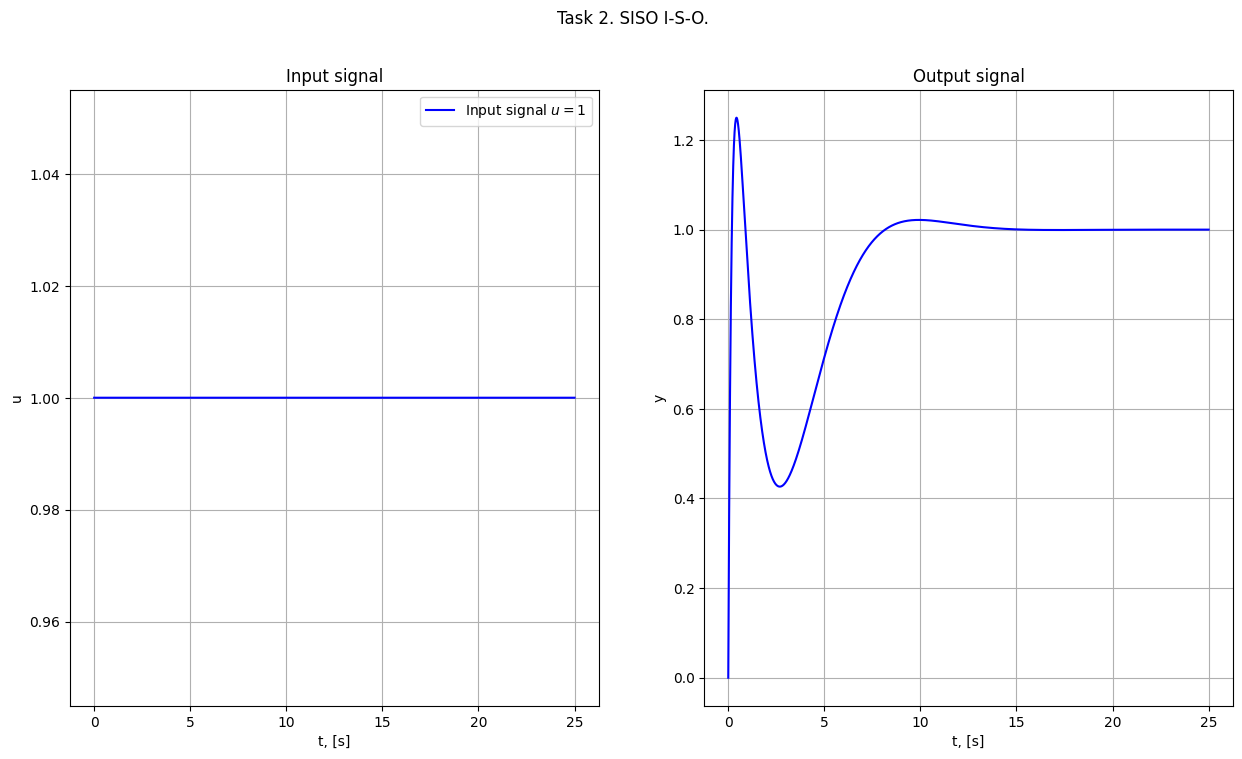

In [10]:
y_2 = ctrl.forced_response(state_space_2, U=u_1, X0=init_state_2, T=time_2).outputs

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("Task 2. SISO I-S-O.")

ax[0].plot(time_2, u_2, "b",label=r"Input signal $u = 1$")
ax[0].set_ylabel("u")
ax[0].set_xlabel("t, [s]")
ax[0].grid(True)
ax[0].set_title("Input signal")
ax[0].legend()

ax[1].plot(time_2, y_2, "b")
ax[1].set_ylabel("y")
ax[1].set_xlabel("t, [s]")
ax[1].grid(True)
ax[1].set_title("Output signal")

Compare results from task 1 & task 2

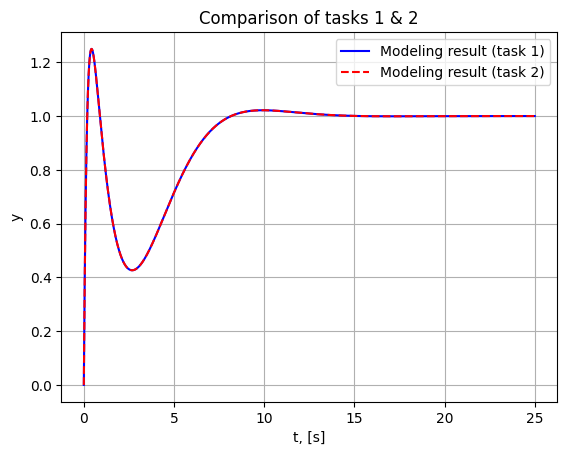

In [11]:
plt.plot(time_1, y_1, "b", label="Modeling result (task 1)")
plt.plot(time_2, y_2, "r", label="Modeling result (task 2)",linestyle="--")
plt.title("Comparison of tasks 1 & 2")
plt.ylabel("y")
plt.xlabel("t, [s]")
plt.grid(True)
plt.legend()

As we can see, modeling results are the same

## Task 3 (MIMO system in Input-Output form)

Set system params

In [12]:
A_3 = sympy.Matrix([[p + 19, p + 3], [ p + 6, p + 2]])
B_3 = sympy.Matrix([[7, 7], [5, 6]])
A_3, B_3

⎛⎡p + 19  p + 3⎤  ⎡7  7⎤⎞
⎜⎢             ⎥, ⎢    ⎥⎟
⎝⎣p + 6   p + 2⎦  ⎣5  6⎦⎠

$A(p) y(t) = B(p)u(t)$, so $y(t) = A^{-1}(p)B(p)u(t)$

Construct transfer function matrix ($T = A^{-1}B$)

In [13]:
T_3 = (A_3.inv() @ B_3)
T_3.simplify()
T_3

⎡  2⋅p - 1       p - 4   ⎤
⎢───────────  ───────────⎥
⎢4⋅(3⋅p + 5)  4⋅(3⋅p + 5)⎥
⎢                        ⎥
⎢  53 - 2⋅p      72 - p  ⎥
⎢───────────  ───────────⎥
⎣4⋅(3⋅p + 5)  4⋅(3⋅p + 5)⎦

In [27]:
A_3.inv()

⎡  p + 2      -p - 3 ⎤
⎢─────────  ─────────⎥
⎢12⋅p + 20  12⋅p + 20⎥
⎢                    ⎥
⎢  -p - 6     p + 19 ⎥
⎢─────────  ─────────⎥
⎣12⋅p + 20  12⋅p + 20⎦

In [14]:
numerators_mat = []
denumerators_mat = []
for el in T_3:
    num, denum = sympy.fraction(el)
    numerators_mat.append(sympy.Poly(num,p).coeffs())
    denumerators_mat.append(sympy.Poly(denum,p).coeffs())
numerators_mat = np.array(numerators_mat, dtype=float).reshape((2, 2, 2))
denumerators_mat = np.array(denumerators_mat, dtype=float).reshape((2, 2, 2))

transferFunction_3 = ctrl.tf(numerators_mat, denumerators_mat)
transferFunction_3

TransferFunction([[array([ 2., -1.]), array([ 1., -4.])], [array([-2., 53.]), array([-1., 72.])]], [[array([12., 20.]), array([12., 20.])], [array([12., 20.]), array([12., 20.])]])

In [29]:
numerators_mat, denumerators_mat

(array([[[ 2., -1.],
         [ 1., -4.]],
 
        [[-2., 53.],
         [-1., 72.]]]),
 array([[[12., 20.],
         [12., 20.]],
 
        [[12., 20.],
         [12., 20.]]]))

Modeling params

In [15]:
modeling_time_3 = 20 
time_3 = np.linspace(0,modeling_time_3,int(modeling_time_3/dt))
u_3_1 = np.zeros_like(time_3) + 1
u_3_2 = 2 * np.sin(time_3)
u_3 = np.array([u_3_1, u_3_2])
init_state_3 = 0

Modeling

Text(0.5, 1.0, 'Output signal')

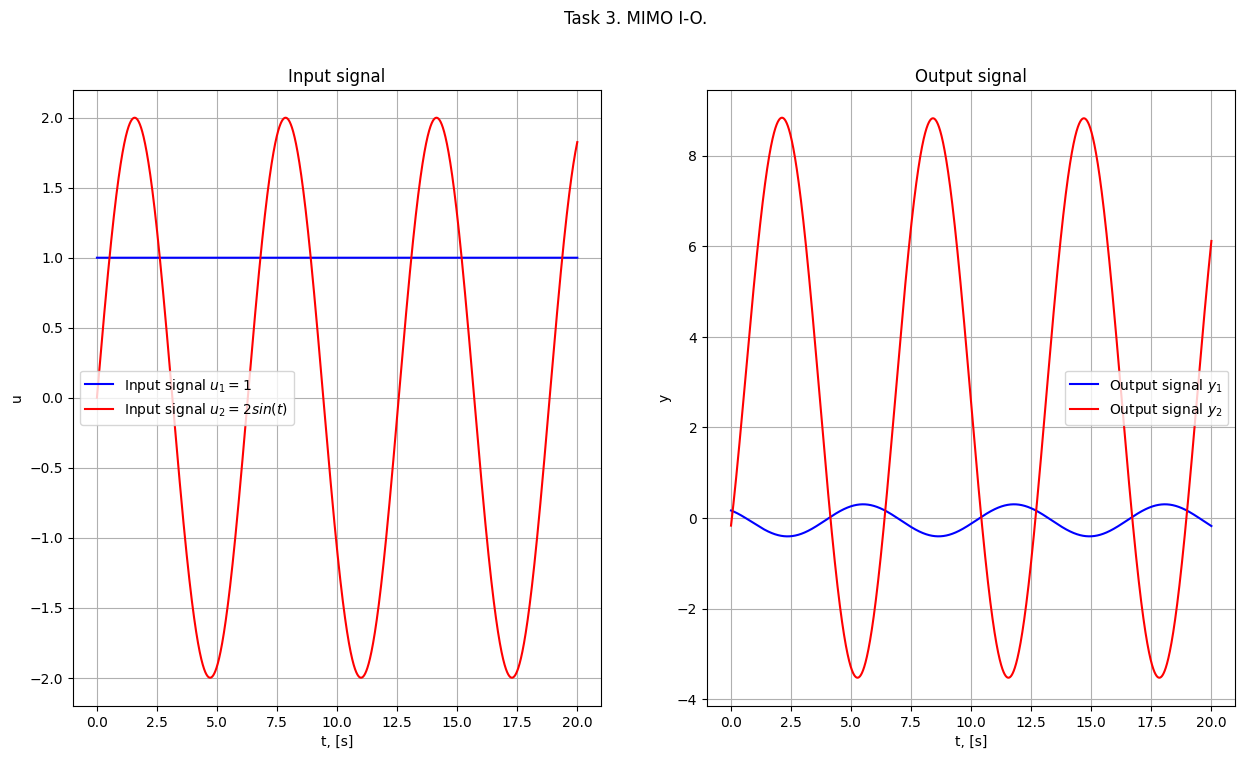

In [16]:
y_3 = ctrl.forced_response(
    transferFunction_3, U=u_3, X0=init_state_3, T=time_3
).outputs

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("Task 3. MIMO I-O.")
ax[0].plot(time_3, u_3_1,"b", label=r"Input signal $u_1 = 1$")
ax[0].plot(time_3, u_3_2,"r", label=r"Input signal $u_2 = 2sin(t)$")
ax[0].grid(True)
ax[0].legend()
ax[0].set_ylabel("u")
ax[0].set_xlabel("t, [s]")
ax[0].set_title("Input signal")

ax[1].plot(time_3, y_3[0,:],"b", label=r"Output signal $y_1$")
ax[1].plot(time_3, y_3[1,:],"r", label=r"Output signal $y_2$")
ax[1].grid(True)
ax[1].legend()
ax[1].set_ylabel("y")
ax[1].set_xlabel("t, [s]")
ax[1].set_title("Output signal")

## Task 4 (SISO system in Input-State-Output form)

Set system params

In [17]:
A_4 = [[0, -6],
       [1, -4]]
B_4 = [[1],
       [3]]
C_4 = [[2, 7]]
D_4 = [[0]]

In [18]:
state_space_4 = ctrlmat.ss(A_4, B_4, C_4, D_4)
state_space_4

<LinearIOSystem:sys[10]:['u[0]']->['y[0]']>

Modeling params

In [19]:
modeling_time_4 = 8 
time_4 = np.linspace(0,modeling_time_4,int(modeling_time_4/dt))
u_4 = np.zeros_like(time_4) + 1
init_state_4 = [0, 0]

Modeling

Text(0.5, 1.0, 'Output signal')

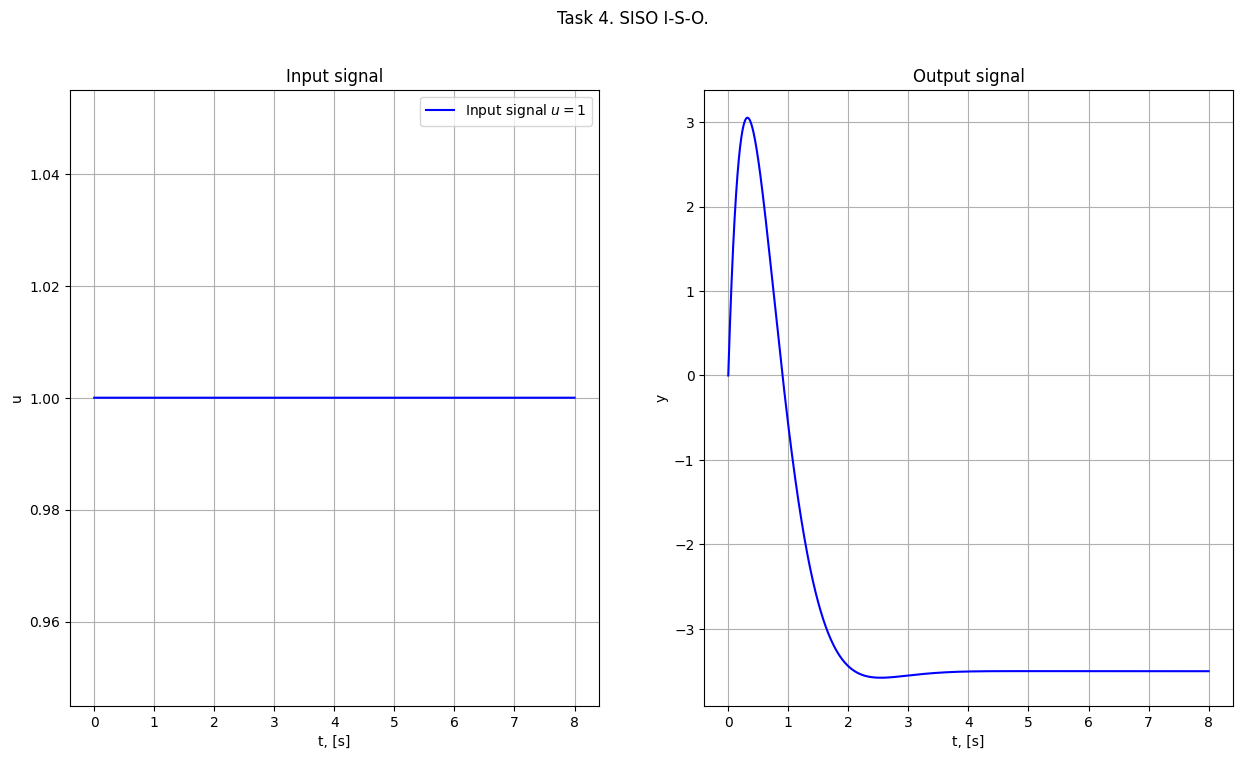

In [20]:

y_4 = ctrl.forced_response(
    state_space_4, U=u_4, X0=init_state_4, T=time_4
).outputs

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("Task 4. SISO I-S-O.")

ax[0].plot(time_4, u_4, "b",label=r"Input signal $u = 1$")
ax[0].set_ylabel("u")
ax[0].set_xlabel("t, [s]")
ax[0].grid(True)
ax[0].set_title("Input signal")
ax[0].legend()

ax[1].plot(time_4, y_4, "b")
ax[1].set_ylabel("y")
ax[1].set_xlabel("t, [s]")
ax[1].grid(True)
ax[1].set_title("Output signal")

## Task 5 (MIMO system in Input-State-Output form)

Set system params

In [21]:
A_5 = [[0, -6],
       [1, -4]]
B_5 = [[1, 9],
       [3, 2]]
C_5 = [[3, 5],
       [2, 7]]
D_5 = [[0, 0],
       [0, 0]]

In [22]:
state_space_5 = ctrlmat.ss(A_5, B_5, C_5, D_5)
state_space_5

<LinearIOSystem:sys[11]:['u[0]', 'u[1]']->['y[0]', 'y[1]']>

Modeling params

In [23]:
modeling_time_5 = 20 
time_5 = np.linspace(0,modeling_time_5,int(modeling_time_5/dt))
u_5_1 = np.ones_like(time_5) 
u_5_2 = 2 * np.sin(time_5)
u_5 = np.array([u_5_1, u_5_2])
init_state_5 = [0, 0]

Modeling

Text(0.5, 1.0, 'Output signal')

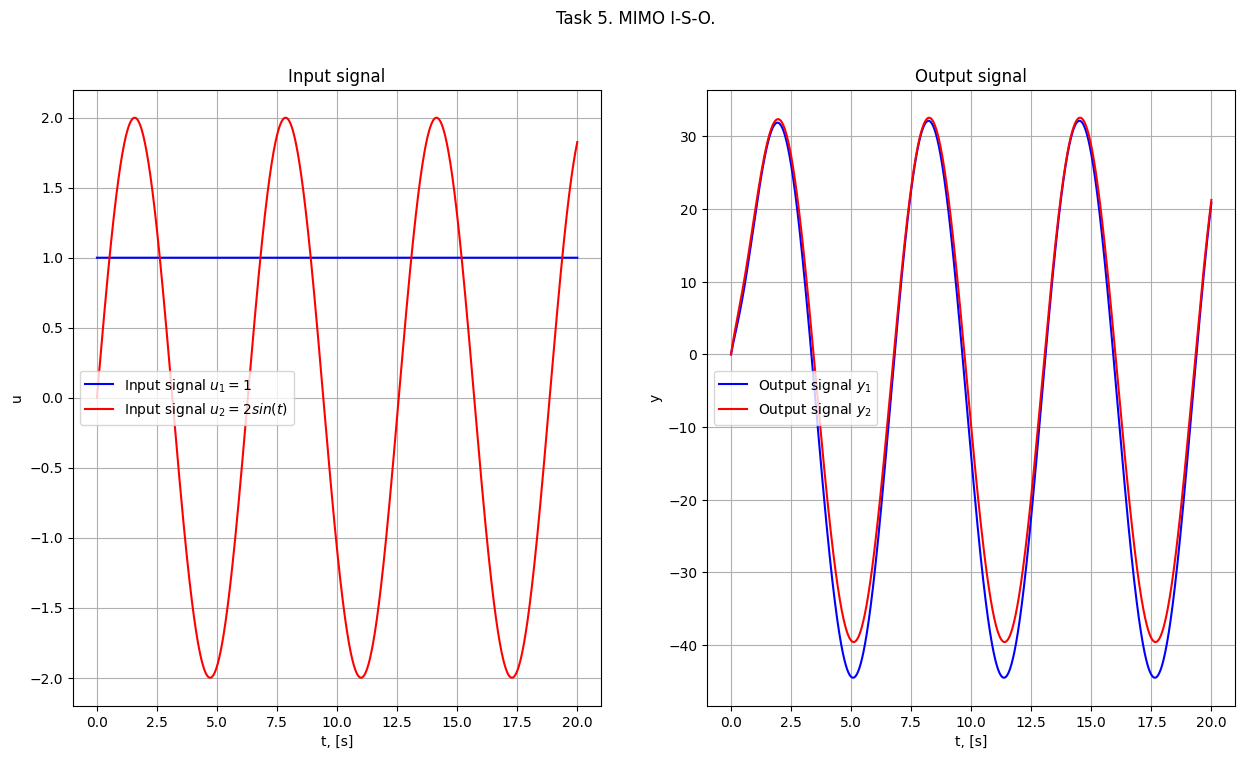

In [24]:
y_5 = ctrl.forced_response(
    state_space_5, U=u_5, X0=init_state_5, T=time_5
).outputs

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
fig.suptitle("Task 5. MIMO I-S-O.")
ax[0].plot(time_5, u_5_1,"b", label=r"Input signal $u_1 = 1$")
ax[0].plot(time_5, u_5_2,"r", label=r"Input signal $u_2 = 2sin(t)$")
ax[0].grid(True)
ax[0].legend()
ax[0].set_ylabel("u")
ax[0].set_xlabel("t, [s]")
ax[0].set_title("Input signal")

ax[1].plot(time_5, y_5[0,:],"b", label=r"Output signal $y_1$")
ax[1].plot(time_5, y_5[1,:],"r", label=r"Output signal $y_2$")
ax[1].grid(True)
ax[1].legend()
ax[1].set_ylabel("y")
ax[1].set_xlabel("t, [s]")
ax[1].set_title("Output signal")

## Report

Simulations of several linear systems were done during this laboratory practice.</br> I've obtained an experiecnce of modeling SISO & MIMO systems in different representation forms (I-O, I-S-O & transfer function matrices). Different methods of conversion between them were discovered (canonical reachable & observable forms). Also, python control library was tested (instead of using matlib & simulink).